### Import LIbraries

In [149]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

### Import Data

In [5]:
data_path = os.path.join(os.path.pardir, 'data')
titanic_train_path = os.path.join(data_path, 'train.csv')
titanic_test_path = os.path.join(data_path, 'test.csv')

In [6]:
titanic_train = pd.read_csv(titanic_train_path, index_col='PassengerId')
titanic_test = pd.read_csv(titanic_test_path, index_col='PassengerId')

### Data Structure

In [148]:
titanic_train.shape, titanic_test.shape

((891, 11), (418, 11))

In [17]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Statistical Summary

In [24]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
titanic_train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Jalsevac, Mr. Ivan",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Grouping

In [26]:
titanic_train.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [93]:
titanic_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [104]:
titanic_train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [106]:
titanic_train.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.2875,37.0
2,14.2500,29.0
3,8.0500,24.0


In [110]:
pd.crosstab(titanic_train.Sex, titanic_train.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [112]:
titanic_train.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [115]:
titanic_train.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [116]:
titanic_train.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


### Visualization 

In [61]:
%matplotlib inline

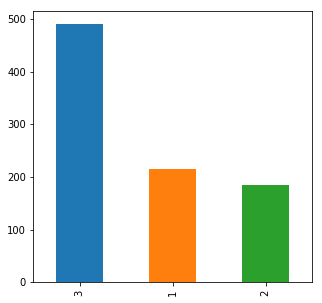

In [99]:
titanic_train.Pclass.value_counts().plot(kind='bar', figsize=(5,5))

Survived       AxesSubplot(0.125,0.657941;0.352273x0.222059)
Pclass      AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Age            AxesSubplot(0.125,0.391471;0.352273x0.222059)
SibSp       AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Parch             AxesSubplot(0.125,0.125;0.352273x0.222059)
Fare           AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

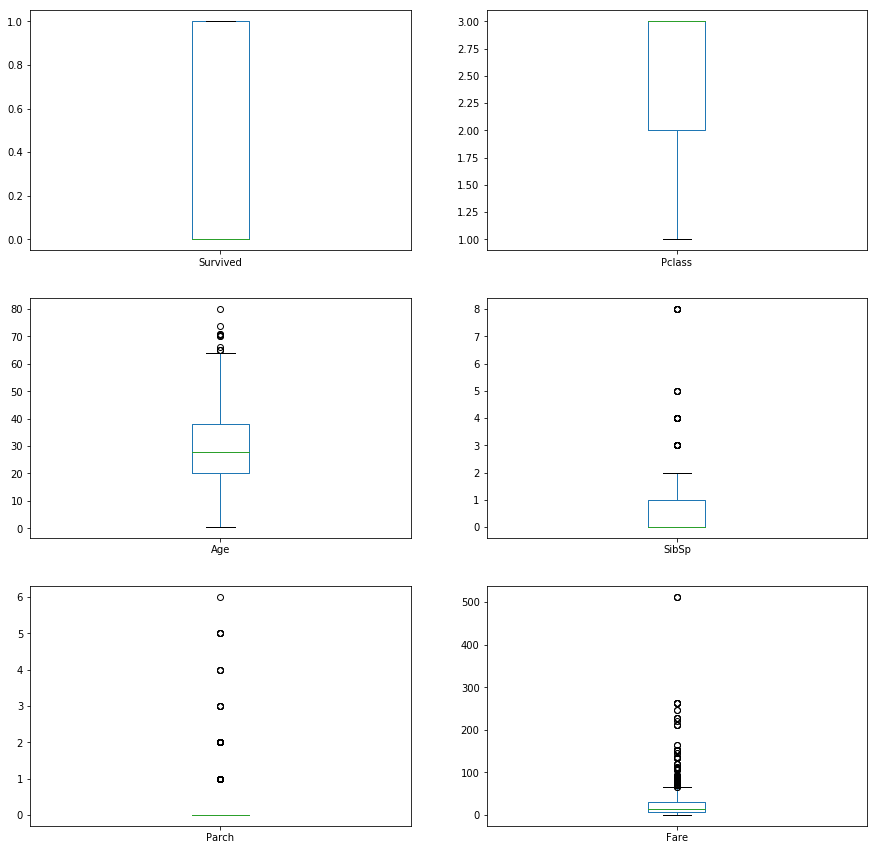

In [80]:
titanic_train.plot(kind='box', subplots=True, layout=(3,2), figsize=(15, 15))

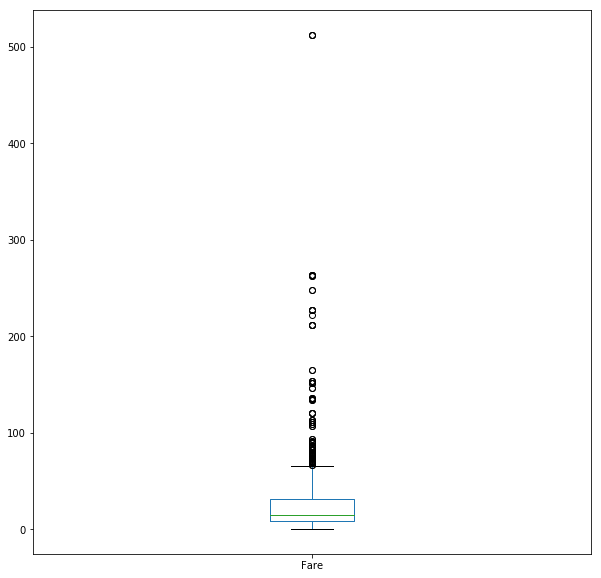

In [69]:
titanic_train.Fare.plot(kind='box', figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A49999668>,
      dtype=object)

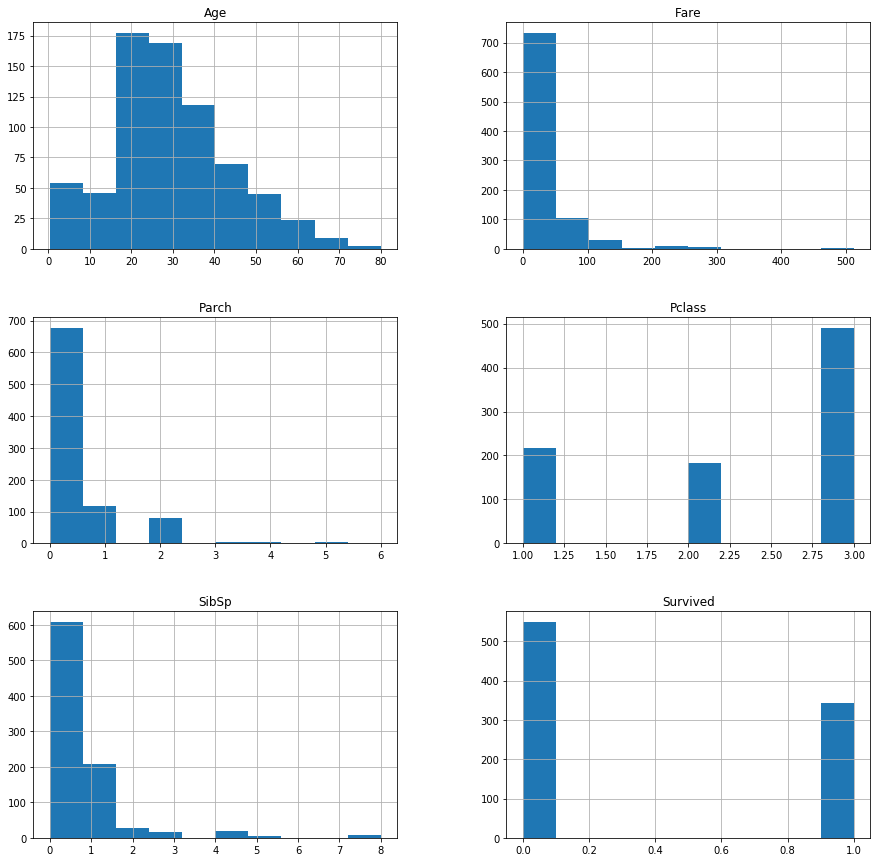

In [75]:
titanic_train.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4E08F390>,
      dtype=object)

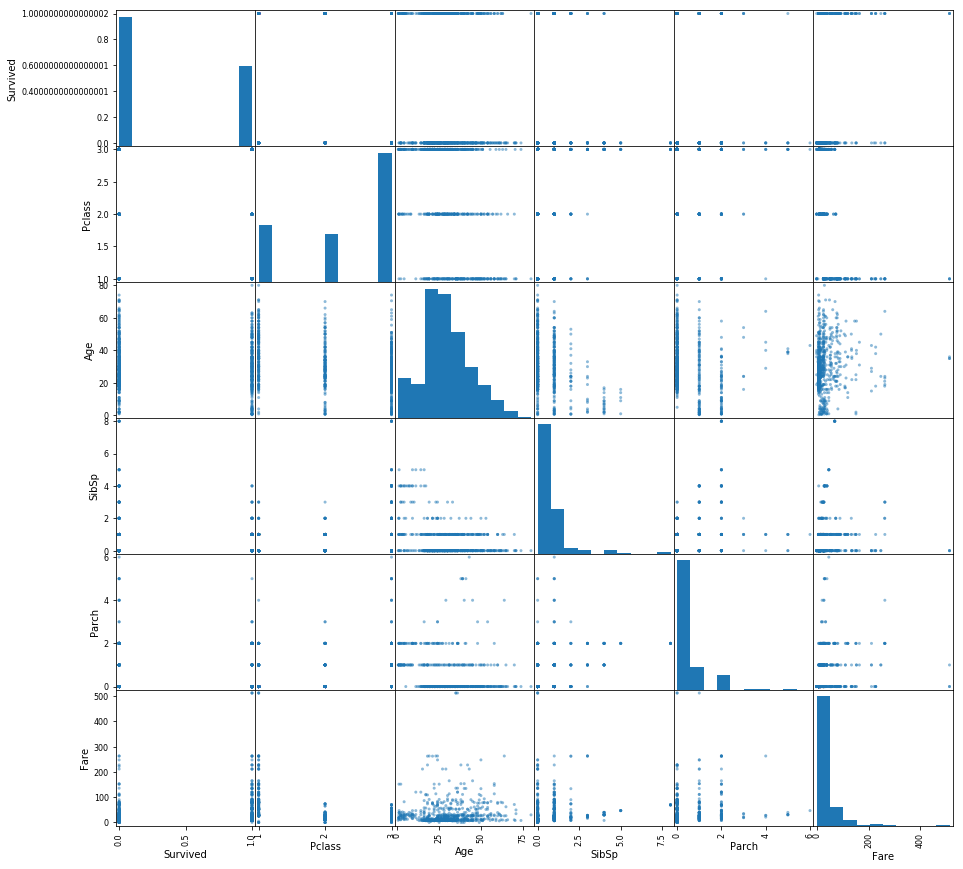

In [89]:
pdplt.scatter_matrix(titanic_train, figsize=(15,15))

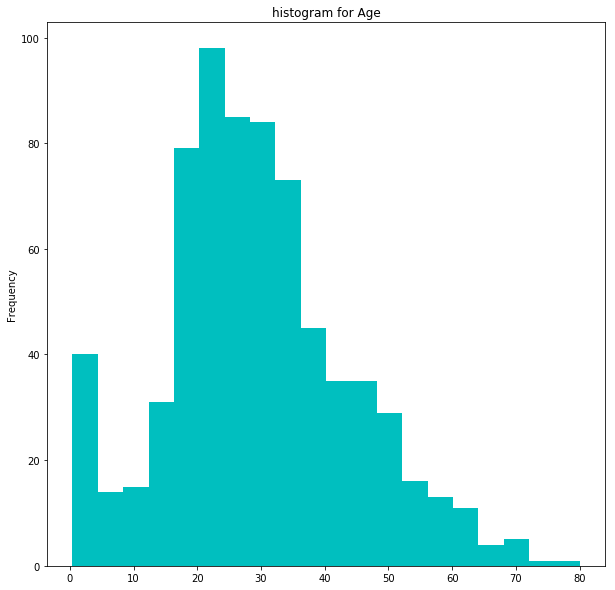

In [102]:
titanic_train.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20, figsize=(10,10));

### Data Munging 

In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [9]:
titanic_test['Survived'] = -999 # Adding Survived with a default value

In [10]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [11]:
data = pd.concat((titanic_train, titanic_test), axis=0, sort=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Embarked

In [16]:
data[data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [17]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
pd.crosstab(titanic_train.Survived, titanic_train.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [19]:
data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

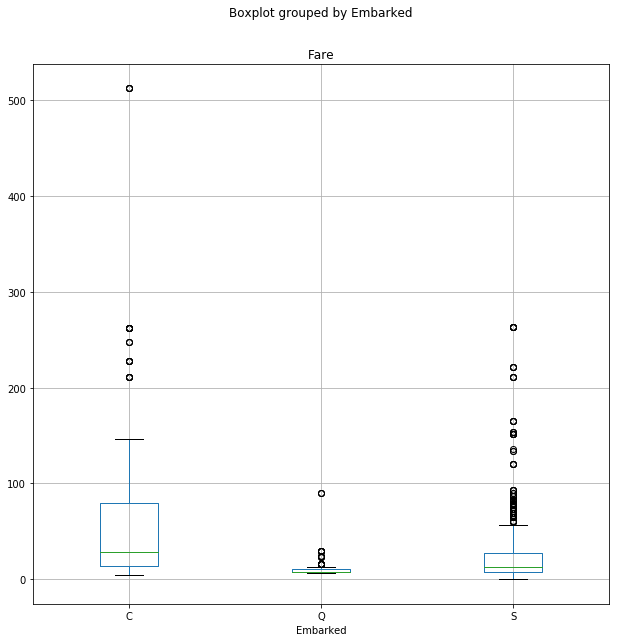

In [146]:
data.boxplot('Fare', 'Embarked', figsize=(10,10))

In [13]:
data.Embarked.fillna('C', inplace=True)

In [14]:
data[data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


### Fare

In [140]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [15]:
median_fare = data.loc[(data.Pclass == 3) & (data.Embarked == 'S'),'Fare'].median()

In [16]:
data.Fare.fillna(median_fare, inplace=True)

In [17]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [18]:
data['Fare_Bin'] = pd.qcut(data.Fare, 4, labels=['very_low','low','high','very_high'])

### Age

In [141]:
data[data.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


In [19]:
def get_title(name):
    fname_title = name.split(',')[1]
    title = fname_title.split('.')[0]
    return title.strip().lower()

In [23]:
data.Name.map(get_title)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
8       master
9          mrs
10         mrs
11        miss
12        miss
13          mr
14          mr
15        miss
16         mrs
17      master
18          mr
19         mrs
20         mrs
21          mr
22          mr
23        miss
24          mr
25        miss
26         mrs
27          mr
28          mr
29        miss
30          mr
         ...  
1280        mr
1281    master
1282        mr
1283       mrs
1284    master
1285        mr
1286        mr
1287       mrs
1288        mr
1289       mrs
1290        mr
1291        mr
1292      miss
1293        mr
1294      miss
1295        mr
1296        mr
1297        mr
1298        mr
1299        mr
1300      miss
1301      miss
1302      miss
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [20]:
def get_common_title(name):
    title_map = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    fname_title = name.split(',')[1]
    title = fname_title.split('.')[0]
    title = title.strip().lower()
    return title_map[title]

In [25]:
data.Name.map(get_common_title)

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
6           Mr
7           Mr
8       Master
9          Mrs
10         Mrs
11        Miss
12        Miss
13          Mr
14          Mr
15        Miss
16         Mrs
17      Master
18          Mr
19         Mrs
20         Mrs
21          Mr
22          Mr
23        Miss
24          Mr
25        Miss
26         Mrs
27          Mr
28          Mr
29        Miss
30          Mr
         ...  
1280        Mr
1281    Master
1282        Mr
1283       Mrs
1284    Master
1285        Mr
1286        Mr
1287       Mrs
1288        Mr
1289       Mrs
1290        Mr
1291        Mr
1292      Miss
1293        Mr
1294      Miss
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300      Miss
1301      Miss
1302      Miss
1303       Mrs
1304      Miss
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Name, Length: 1309, dtype: object

In [21]:
data['Title'] = data.Name.map(get_common_title)

In [27]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


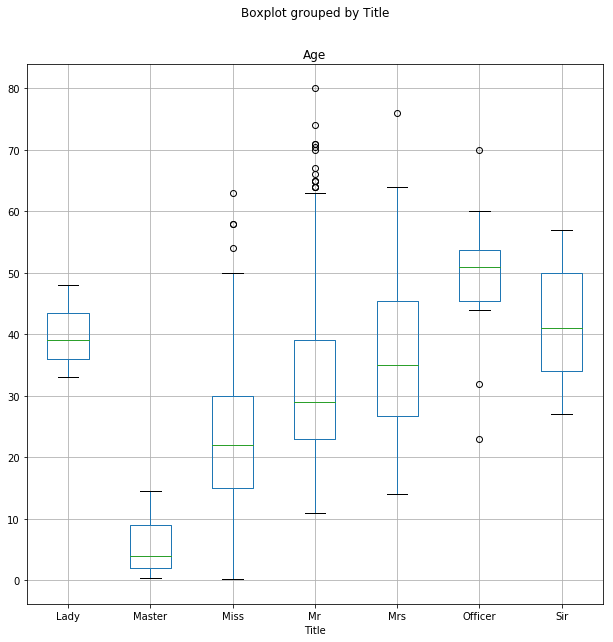

In [156]:
data[data.Age.notnull()].boxplot('Age','Title', figsize = (10,10));

In [23]:
title_age_median = data.groupby('Title').Age.transform('median')
data.Age.fillna(title_age_median , inplace=True)

In [24]:
data[data.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,Title
PassengerId,,,,,,,,,,,,,


### Age

In [25]:
data['AgeState'] = np.where(data['Age'] >= 15, 'Adult','Child')

In [32]:
data['AgeState'].value_counts()

Adult    1192
Child     117
Name: AgeState, dtype: int64

In [33]:
pd.crosstab(data[data.Survived != -999].Survived, data[data.Survived != -999].AgeState)

AgeState,Adult,Child
Survived,,
0,514,35
1,295,47


### Family

In [26]:
data['FamilySize'] = data.Parch + data.SibSp 

In [27]:
pd.crosstab(data[data.Survived != -999].Survived, data[data.Survived != -999].FamilySize)

FamilySize,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Mother 

In [36]:
data['IsMother'] = np.where(((data.Sex == 'female') & (data.Parch > 0) & (data.Age > 18) & (data.Title != 'Miss')), 1, 0)

In [37]:
pd.crosstab(data[data.Survived != -999].Survived, data[data.Survived != -999].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Age           1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Fare_Bin      1309 non-null category
Title         1309 non-null object
AgeState      1309 non-null object
FamilySize    1309 non-null int64
dtypes: category(1), float64(2), int64(5), object(7)
memory usage: 154.9+ KB


In [29]:
data.loc[data.Cabin == 'T', 'Cabin'] = np.NaN

In [30]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

In [31]:
data['Deck'] = data['Cabin'].map(get_deck)

In [32]:
data[data.Deck.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,Title,AgeState,FamilySize,Deck
PassengerId,,,,,,,,,,,,,,,,


### Feature Encoding

In [33]:
data['IsMale'] = np.where(data.Sex == 'male', 1, 0)

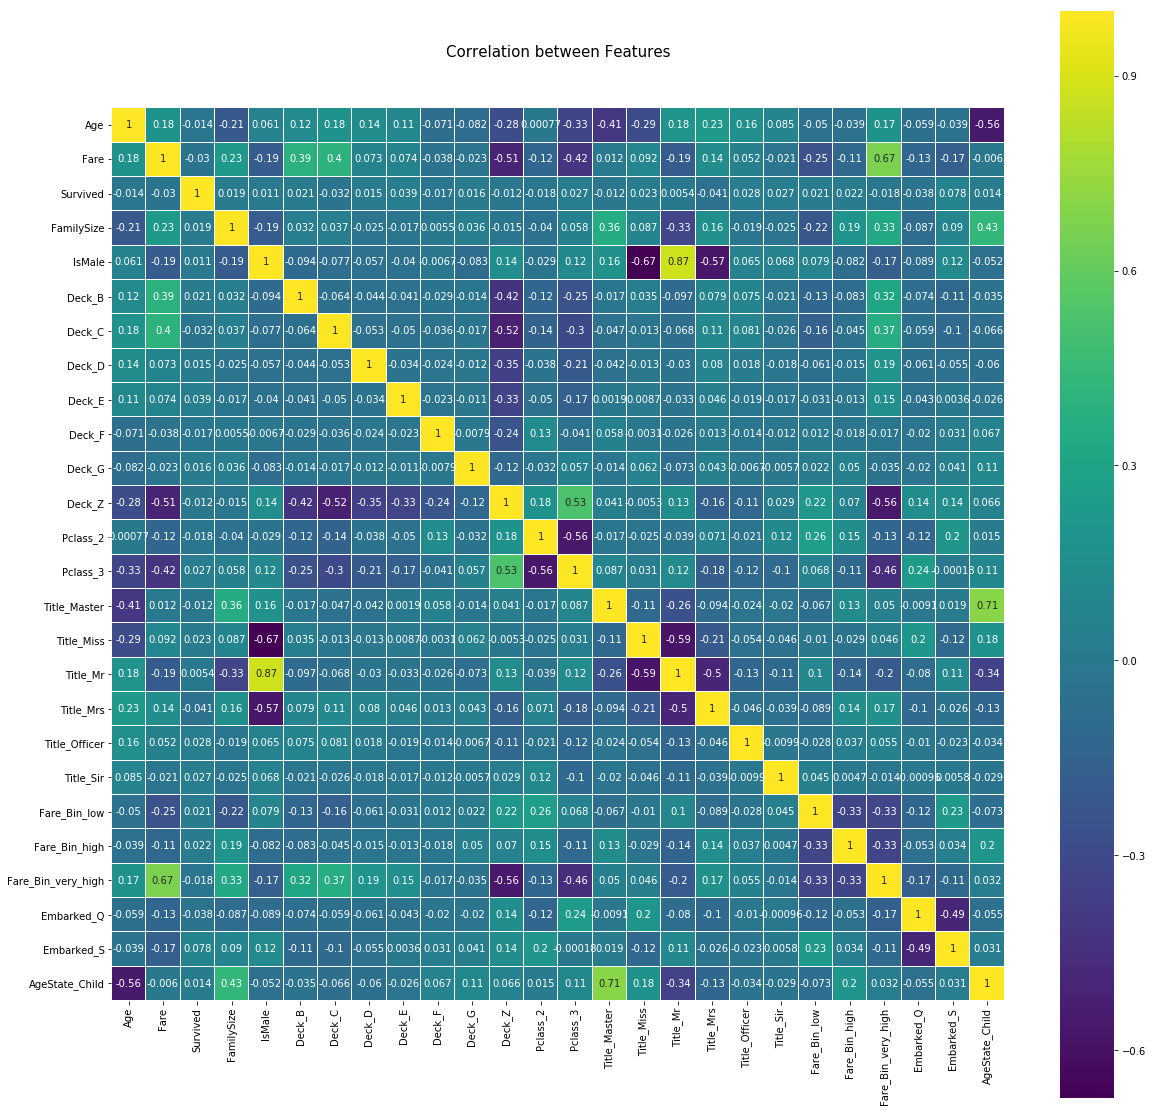

In [154]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(data.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [35]:
data = pd.get_dummies(data,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'], drop_first=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMale                1309 non-null int32
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Master          1309 non-null uint8
Titl

In [37]:
data.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [38]:
train_df = data.loc[data.Survived != -999]

In [39]:
columns = [column for column in data.columns if column != 'Survived']
test_df = data.loc[data.Survived == -999, columns]

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 26 columns):
Age                   891 non-null float64
Fare                  891 non-null float64
Survived              891 non-null int64
FamilySize            891 non-null int64
IsMale                891 non-null int32
Deck_B                891 non-null uint8
Deck_C                891 non-null uint8
Deck_D                891 non-null uint8
Deck_E                891 non-null uint8
Deck_F                891 non-null uint8
Deck_G                891 non-null uint8
Deck_Z                891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Title_Master          891 non-null uint8
Title_Miss            891 non-null uint8
Title_Mr              891 non-null uint8
Title_Mrs             891 non-null uint8
Title_Officer         891 non-null uint8
Title_Sir             891 non-null uint8
Fare_Bin_low          891 non-null uint8
Fare_Bin_high         891 non-

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 25 columns):
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMale                418 non-null int32
Deck_B                418 non-null uint8
Deck_C                418 non-null uint8
Deck_D                418 non-null uint8
Deck_E                418 non-null uint8
Deck_F                418 non-null uint8
Deck_G                418 non-null uint8
Deck_Z                418 non-null uint8
Pclass_2              418 non-null uint8
Pclass_3              418 non-null uint8
Title_Master          418 non-null uint8
Title_Miss            418 non-null uint8
Title_Mr              418 non-null uint8
Title_Mrs             418 non-null uint8
Title_Officer         418 non-null uint8
Title_Sir             418 non-null uint8
Fare_Bin_low          418 non-null uint8
Fare_Bin_high         418 non-null uint8
Fare_Bin_very_high    418 n

In [126]:
X = train_df.loc[:, train_df.columns != 'Survived']

In [127]:
Y = train_df['Survived']

In [130]:
X.shape, Y.shape

((891, 25), (891,))

In [131]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.2, random_state=7)

In [132]:
# Spot-Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.837148 (0.056674)
RF: 0.824531 (0.055559)
GB: 0.840023 (0.053627)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

XGB: 0.837226 (0.045637)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [133]:
params_logreg = [{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}]
grid_logreg = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = params_logreg,
                           scoring = 'accuracy',
                           cv = 10)
grid_logreg = grid_logreg.fit(X_train, Y_train)
best_acc_logreg = grid_logreg.best_score_
best_params_logreg = grid_logreg.best_params_

In [134]:
params_rforest = [{'n_estimators': [200, 300],
                   'max_depth': [5, 7, 10],
                   'min_samples_split': [2, 4]}]
grid_rforest = GridSearchCV(estimator = RandomForestClassifier(criterion = 'gini',random_state = 0, n_jobs=-1),
                            param_grid = params_rforest,
                            scoring = 'accuracy',
                            cv = 10)
grid_rforest = grid_rforest.fit(X_train, Y_train)
best_acc_rforest = grid_rforest.best_score_
best_params_rforest = grid_rforest.best_params_

In [156]:
params_gboost = [{'n_estimators': [10,20,40],
                   'max_depth': [6,8,10],
                   'min_samples_split': [10, 20, 30]}]
grid_gboost = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, random_state=10),
                            param_grid = params_gboost,
                            scoring = 'accuracy',
                            cv = 10)
grid_gboost = grid_gboost.fit(X_train, Y_train)
best_acc_gboost = grid_gboost.best_score_
best_params_gboost = grid_gboost.best_params_

In [136]:
params_xgb = [{'n_estimators': [20,81,10],
                   'max_depth': [5, 6, 12],
                   'min_samples_split': [200, 1000, 200]}]
grid_xgb = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, random_state=10),
                            param_grid = params_xgb,
                            scoring = 'accuracy',
                            cv = 10)
grid_xgb = grid_xgb.fit(X_train, Y_train)
best_acc_xgb = grid_xgb.best_score_
best_params_xgb = grid_xgb.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [157]:
grid_score_dict = {'Best Score': [best_acc_logreg,best_acc_rforest, best_acc_gboost, best_acc_xgb],
                   'Optimized Parameters': [best_params_logreg,best_params_rforest, best_params_gboost, best_params_xgb],
                  }
pd.DataFrame(grid_score_dict, index=['Logistic Regression','Random Forest', 'Gradient Boosting', 'XGB Classifier'])

,Best Score,Optimized Parameters
Logistic Regression,0.839888,"{'C': 1, 'penalty': 'l2'}"
Random Forest,0.845506,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
Gradient Boosting,0.853933,"{'max_depth': 6, 'min_samples_split': 20, 'n_e..."
XGB Classifier,0.846910,"{'max_depth': 6, 'min_samples_split': 200, 'n_..."


In [158]:
best_params_gboost

{'max_depth': 6, 'min_samples_split': 20, 'n_estimators': 20}

In [60]:
lr = LogisticRegression(C=1.0, penalty = 'l1')
lr.fit(X_train, Y_train) 
predictions = lr.predict(X_val) 
print(accuracy_score(Y_val, predictions)) 
print(confusion_matrix(Y_val, predictions)) 
print(classification_report(Y_val, predictions))

0.7932960893854749
[[96 14]
 [23 46]]
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       110
          1       0.77      0.67      0.71        69

avg / total       0.79      0.79      0.79       179



In [90]:
rfc = RandomForestClassifier(max_depth=10, min_samples_split=2,n_estimators=200)
rfc.fit(X_train, Y_train) 
predictions = rfc.predict(X_val) 
print(accuracy_score(Y_val, predictions)) 
print(confusion_matrix(Y_val, predictions)) 
print(classification_report(Y_val, predictions))

0.8212290502793296
[[100  10]
 [ 22  47]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       110
          1       0.82      0.68      0.75        69

avg / total       0.82      0.82      0.82       179



In [73]:
rfc.feature_importances_

array([0.05310511, 0.07430877, 0.06315847, 0.20859636, 0.00546973,
       0.00320857, 0.00306724, 0.01187369, 0.00094413, 0.00095494,
       0.04709918, 0.01008151, 0.05816343, 0.00661158, 0.08196783,
       0.24459079, 0.06051816, 0.00546629, 0.00716472, 0.00641219,
       0.00724079, 0.01288342, 0.00423864, 0.01132531, 0.01154916])

In [161]:
gbc = GradientBoostingClassifier(max_depth=6, min_samples_split=20,n_estimators=20)
gbc.fit(X_train, Y_train) 
predictions = gbc.predict(X_val) 
print(accuracy_score(Y_val, predictions)) 
print(confusion_matrix(Y_val, predictions)) 
print(classification_report(Y_val, predictions))

0.7932960893854749
[[101   9]
 [ 28  41]]
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       110
          1       0.82      0.59      0.69        69

avg / total       0.80      0.79      0.79       179



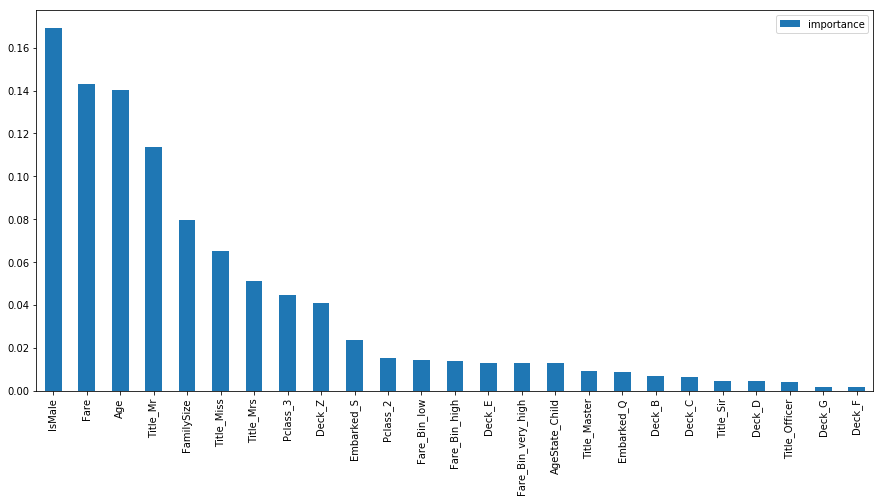

In [147]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar', figsize=(15,7))

In [63]:
def get_submission_file(model, filename):
    # converting to the matrix
    test_X = test_df.as_matrix().astype('float')
    # make predictions
    predictions = model.predict(test_X)
    # submission dataframe
    df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','output')
    submission_file_path = os.path.join(submission_data_path, filename)
    # write to the file
    df_submission.to_csv(submission_file_path, index=False)

In [64]:
get_submission_file(lr, '02_lr.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
get_submission_file(rfc, '03_rfc.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
get_submission_file(gbc, '01_gbc.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
